# The Straight Tower

For a tower with constant cross-sectional area, the tension per unit area varies with a radius $r$ from Earth. The relationship between Tension and radius is modeled by the differential equation:

$$\begin{equation}\frac{dT}{dr} = G\!M\rho\left[\frac{1}{r^2} - \frac{r}{R_g^3}\right]\end{equation}$$

Thus the Tensile Stress at a certain height $\mathrm{h}$ from Earth's surface is given by the following integral:

$$\begin{align} 
\int_{T(R_e)}^{T({\mathrm{h}})} \! dT &= \int_{R_e}^{\mathrm{h}}  GM_e\rho\left[\frac{1}{r^2} - \frac{r}{R_g^3}\right] dr\\
T(\mathrm{h}) - T(R_e) &= \int_{R_e}^{\mathrm{h}} \! GM_e\rho\left[\frac{1}{r^2} - \frac{r}{R_g^3}\right] dr\\
T(\mathrm{h}) &= GM_e\rho\int_{R_e}^{\mathrm{h}} \! \left[\frac{1}{r^2} - \frac{r}{R_g^3}\right] dr \label{eqn:a} \tag{1}
\end{align}$$

Where $M_e$ is the mass of the Earth, $\rho$ is the mass density of the material used to make the tower, $R_e$ is the radius of the Earth, and $R_g$ is geostationary height for Earth. Note that Eq. $(1)$ takes $T(\mathrm{h})$ to be $0$ as an initial condition. Eq. $(1)$ gives a solution for the tension along the height of the space elevator:

$$T(\mathrm{h}) = GM_e\rho\left[\frac{R_e - \mathrm{h^2}}{2R_g^3} - \frac{1}{\mathrm{h}} + \frac{1}{\mathrm{R_e}}\right] \tag{2}$$

We can use Eq. $(2)$ to plot the tensile stress as a function of height for a given material.



In [62]:
import matplotlib.pyplot as plt
import numpy as np
materials = {'Steel': (7900, 7.45E8), 'Titanium Alloy (Grade 5)': (4512, 1.2E9), 
             'Diamond': (3580, 2.93E9), 'Carbon Nanotubes': (1300, 1.3E11)}

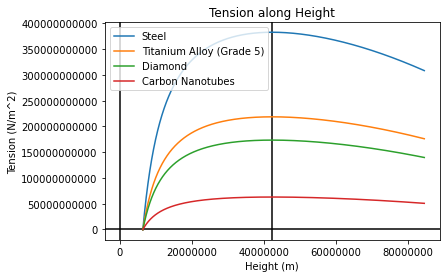

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Define Constants:
R_e = 6_370 * 1000 # m
M_e = 5.98E24 # kg
R_g = 42_300 * 1000 # m
G = 6.67E-11 # Newtons Constant of Gravitation

def get_T_function(p):
    def _get_T(h):
        return G*M_e*p*((R_e-h**2)/(2*R_g**3) - 1 / h + 1 / R_e)
    return _get_T

def get_plot(p):
    T = get_T_function(p)
    xs = list(range(R_e, R_g*2 , 100))
    ys = [T(h) for h in xs]
    return (xs, ys)

plt.title('Tension along Height')
plt.xlabel('Height (m)')
plt.ylabel('Tension (N/m^2)')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.axvline(R_g, color='black')
plt.ticklabel_format(style='plain')
for name, info in materials.items():
    plot = get_plot(info[0])
    plt.plot(plot[0], plot[1], label=name)
plt.legend()
plt.show()
    
    

The vertical line is at $\mathrm{h} = R_g$, showing that maximum tensile stress occurs at the height of geosynchronous orbit. The ultimate tensile strength for each material is so much smaller than the maximum stress for each one, they do not show up on the graph. Only a material with a mass density $\rho$ and ultimate tensile strength $\sigma_{max}$ such that $T(R_g, \rho) \leq \sigma_{max}$ would work for the elevator, and no such material exists on Earth. 

# The Tapered Tower

For a tower with variable cross-sectional area and fixed tensile stress, the relationship between cross-sectional area and radius $r$ is modeled by the differential equation:

$$\frac{d\!A}{A} = \frac{GM_e\rho}{T}\left[\frac{1}{r^2}-\frac{r}{R_g^3}\right]dr$$

Using the substitution $g = \frac{GM_e}{R_e^2}$ we can write this as:

$$\frac{d\!A}{A} = \frac{\rho gR_e^2}{T}\left[\frac{1}{r^2}-\frac{r}{R_g^3}\right]dr$$

As we did for the straight tower, we can find the cross-sectional area at a certain height $\mathrm{h}$ with the following integral:

$$\begin{align}
\int_{A(R_e)}^{A(\mathrm{h})}\frac{d\!A}{A} &= \int_{R_e}^{\mathrm{h}}\frac{\rho gR_e^2}{T}\left[\frac{1}{r^2}-\frac{r}{R_g^3}\right]dr\\
log\left(\frac{A(\mathrm{h})}{A(\!R_e\!)}\right) &= \frac{\rho gR_e^2}{T}\int_{R_e}^{\mathrm{h}}\left[\frac{1}{r^2}-\frac{r}{R_g^3}\right]dr\\
log\left(\frac{A(\mathrm{h})}{A(\!R_e\!)}\right) &= \frac{\rho gR_e^2}{T}\left[\frac{R_e - \mathrm{h^2}}{2R_g^3} - \frac{1}{\mathrm{h}} + \frac{1}{R_e}\right]\\
\end{align}$$

And finally solving for $A(\mathrm{h})$ we get:

$$ A(\mathrm{h}) = A(\!R_e\!) \mathrm{exp}\!\left(\frac{\rho gR_e^2}{T}\left[\frac{R_e - \mathrm{h^2}}{2R_g^3} - \frac{1}{\mathrm{h}} + \frac{1}{R_e}\right]\right) \tag{3}$$

Where $T$ is the tensile stress chosen for the elevator and $A(\!R_e\!)$ is the starting cross-sectional area on Earth's surface (how wide the elevator is). For this simulation, we will take $T$ to be the ultimate tensile strength for a given material. 

It will be helpful to rearrange Eq. $(3)$ to solve for the ratio of the cross-sectional area at height $\mathrm{h}$ to the cross-sectional area at the base of the tower:

$$\frac{A(\mathrm{h})}{A(\!R_e\!)} = \mathrm{exp}\!\left(\frac{\rho gR_e^2}{T}\left[\frac{R_e - \mathrm{h^2}}{2R_g^3} - \frac{1}{\mathrm{h}} + \frac{1}{R_e}\right]\right) \tag{4}$$

We can use Eq. $(4)$ to plot the growth of the cross-sectional area of the elevator for different materials.

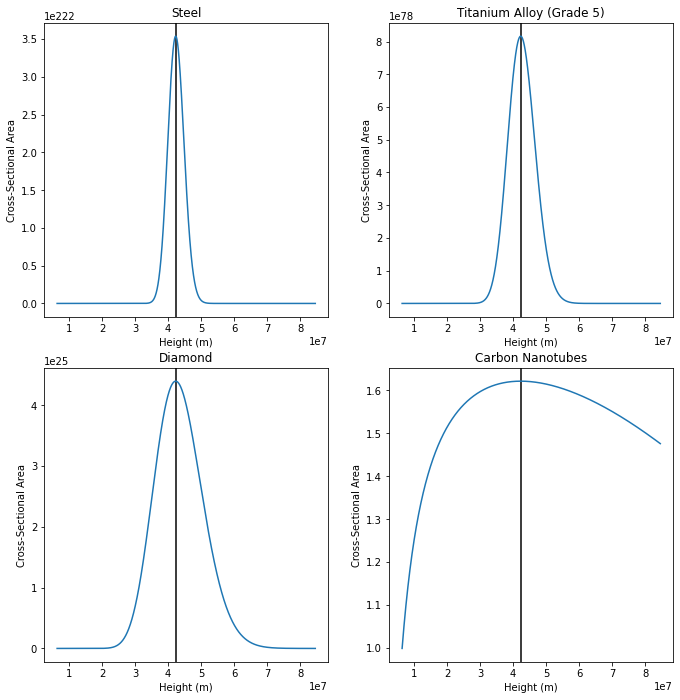

In [64]:
import math
g = 9.8 # m/s
def get_A_function(p, T):
    def _get_A(h):
        return math.exp((p*g*R_e**2)/T * ((R_e-h**2)/(2*R_g**3) - h**-1 + R_e**-1))
    return _get_A 

def get_plot(info):
    A = get_A_function(info[0], info[1])
    xs = list(range(R_e, R_g*2 , 100))
    ys = [A(h) for h in xs]
    return (xs, ys)

fig, axs = plt.subplots(2,2, figsize=(10,10))
fig.tight_layout(pad=3)
#ax.axhline(0, color='black')
#ax.axvline(0, color='black')
items = list(materials.items())
for i in range(len(axs.flat)):
    name, info = items[i]
    plot = get_plot(info)
    axs.flat[i].axvline(R_g, color='black')
    axs.flat[i].set(xlabel='Height (m)', ylabel='Cross-Sectional Area')
    axs.flat[i].set_title(name)
    axs.flat[i].plot(plot[0], plot[1])
    #axs.flat[i].label_outer()


Again, the height of geosynchronous orbit is marked with a vertical line. Note that the axes for Steel, Titanium, and Diamond are scaled logarithmically, so the height grows to a massive size. Steel, for instance, grows to a ratio of about $3.5 \times 10^{222}$. Carbon Nanotubes, however, assuming we could manufacture it with a ultimate tensile strength of $1.3 \times 10^{11} \frac{\mathrm{N}}{\mathrm{m}^2}$, only needs to grow to about $1.6$ times it's original cross-sectional area.